In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Load Data

In [2]:
# df = pd.read_csv("/Users/almgacis/Documents/OneDriveMSU/MSU/STT_811/Project/training.csv")

In [3]:
df = pd.read_csv("train.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
df.shape

(91713, 186)

In [6]:
df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

# Catecorical / Numeric

In [7]:
categorical = []
# Get the datatype of each column
data_types = df.dtypes # int64', 'float64', 'object'

# 'Object' -> Categorical variable
categorical = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical variables
print(categorical)

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [8]:
# Add all the integer columns into the categorical (sine they are all categorical)
int_vars = data_types[data_types == 'int64'].index.tolist()
for var in int_vars:
    categorical.append(var)

In [9]:
# Add some float columns into the categorical 
# when the number of unique values is less than 11

float_vars = data_types[data_types == 'float64'].index.tolist()

for var in float_vars:
    if len(df[var].unique()) <= 10:
        categorical.append(var)

In [10]:
print(categorical)

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'elective_surgery', 'icu_id', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [11]:
print(f"Total number of categorical variables: {len(categorical)}")

Total number of categorical variables: 31


In [12]:
pd.set_option('display.max_columns', None)

df_numeric = df.drop(columns = categorical)
df_numeric

,age,bmi,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,180.3,0.541667,73.9,2.3,113.0,502.01,0.4,31.0,2.51,NaN,168.0,118.0,27.4,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,14.10,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05
1,77.0,27.420000,160.0,0.927778,70.2,NaN,108.0,203.01,NaN,9.0,0.56,1.0,145.0,120.0,36.9,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,12.70,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,NaN,NaN,61.0,48.0,61.0,48.0,114.0,100.0,NaN,NaN,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,NaN,NaN,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.30,12.70,NaN,NaN,NaN,NaN,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.70,12.70,37.0,37.0,7.45,7.45,51.0

In [13]:
# Create a dataframe only for the categorical
df_categorical = df.loc[:, categorical]

# Change all the integer column into the object type
df_categorical = df_categorical.iloc[:,:].astype('object')

df_categorical.head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,encounter_id,patient_id,hospital_id,hospital_death,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular,66154,25312,118,0,0,92,0,0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory,114252,59342,81,0,0,90,0,0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic,119783,50777,118,0,0,93,0,0,0.0,3.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular,79267,46918,118,0,1,92,0,1,0.0,4.0,6.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma,92056,34377,33,0,0,91,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ethnicity                    90318 non-null  object
 1   gender                       91688 non-null  object
 2   hospital_admit_source        70304 non-null  object
 3   icu_admit_source             91601 non-null  object
 4   icu_stay_type                91713 non-null  object
 5   icu_type                     91713 non-null  object
 6   apache_3j_bodysystem         90051 non-null  object
 7   apache_2_bodysystem          90051 non-null  object
 8   encounter_id                 91713 non-null  object
 9   patient_id                   91713 non-null  object
 10  hospital_id                  91713 non-null  object
 11  hospital_death               91713 non-null  object
 12  elective_surgery             91713 non-null  object
 13  icu_id                       91

# PCA w/o categorical, missingness

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# Pairwise deletion - drop missing values (only 30 of rows left)

df_complete = df_numeric.dropna()

# Scale the data 

scaler = StandardScaler()
scaler.fit(df_complete)
df_scaled = scaler.transform(df_complete)

# Transform to DataFrame & Add target column

df_scaled = pd.DataFrame(df_scaled, columns = df_complete.columns)
df_scaled['hospital_death'] = df['hospital_death']

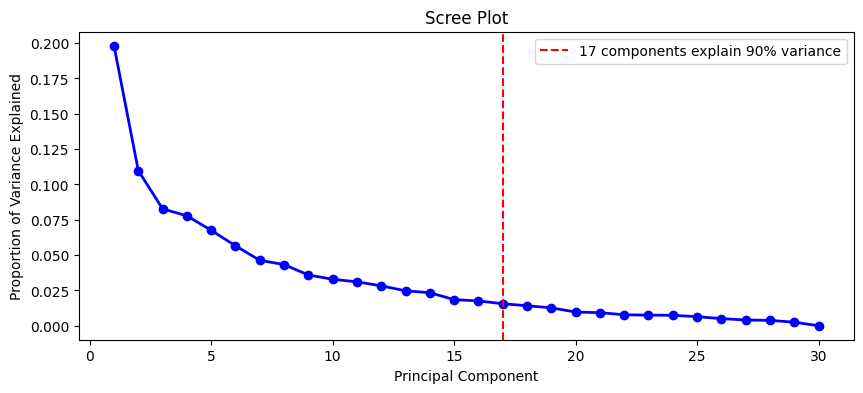

Total number of components: 30         
 Component 1st : 0.19816712952890309         
 Component 2nd : 0.10977973204522376         
 Component 3rd : 0.08273144785348695


In [22]:
# PCA 
pca = PCA()
pca_mod = pca.fit(df_scaled.iloc[:, :-1]) # fit but excluding target

# Transform to DataFrame
df_pca = pca_mod.transform(df_scaled.iloc[:, :-1])
df_pca = pd.DataFrame(df_pca)

# Scree plot
plt.figure(figsize=(10,4))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

# Add vertical line at 90% cumulative variance explained
x = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
plt.axvline(x=x, color='r', linestyle='--', label=f'{x} components explain 90% variance')

# Add legend for vertical line
plt.legend()

plt.show()

# Principal Component 
print(f"Total number of components: {pca.n_components_} \
        \n Component 1st : {pca.explained_variance_ratio_[0]} \
        \n Component 2nd : {pca.explained_variance_ratio_[1]} \
        \n Component 3rd : {pca.explained_variance_ratio_[2]}")

# PCA w/o categorical, w/ Imputation (mode)

In [23]:
# Imputation

imputer = SimpleImputer(strategy = 'most_frequent') # another: median
df_imputed = imputer.fit_transform(df_numeric)


# Scale the data 

scaler = StandardScaler()
scaler.fit(df_imputed)
df_scaled = scaler.transform(df_imputed)

# Transform to DataFrame & Add target column

df_scaled = pd.DataFrame(df_scaled, columns = df_numeric.columns)
df_scaled['hospital_death'] = df['hospital_death']

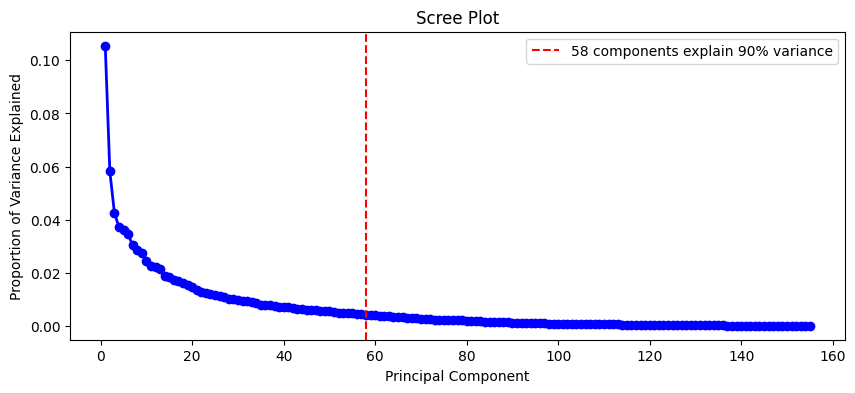

Total number of components: 155         
 Component 1st : 0.10551495956388124         
 Component 2nd : 0.05815092433650027         
 Component 3rd : 0.04258076901388277


In [24]:
# PCA 
pca = PCA()
pca_mod = pca.fit(df_scaled.iloc[:, :-1]) # fit but excluding target

# Transform to DataFrame
df_pca = pca_mod.transform(df_scaled.iloc[:, :-1])
df_pca = pd.DataFrame(df_pca)

# Scree plot
plt.figure(figsize=(10,4))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

# Add vertical line at 90% cumulative variance explained
x = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
plt.axvline(x=x, color='r', linestyle='--', label=f'{x} components explain 90% variance')

# Add legend for vertical line
plt.legend()

plt.show()

# Principal Component 
print(f"Total number of components: {pca.n_components_} \
        \n Component 1st : {pca.explained_variance_ratio_[0]} \
        \n Component 2nd : {pca.explained_variance_ratio_[1]} \
        \n Component 3rd : {pca.explained_variance_ratio_[2]}")


In [25]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,4.105025,0.091637,-1.157559,-1.568752,-5.068210,-0.638332,0.235129,-1.787259,-2.160678,-1.264132,0.038919,-0.952047,1.324853,-0.462842,0.267253,-0.522986,-2.966978,-0.649061,2.762462,-0.631806,0.959504,-3.709697,0.440538,1.379126,0.747737,1.495562,-0.784161,-0.336195,-1.123781,-0.585485,0.410694,0.240341,1.316984,0.006926,0.302751,-1.063629,0.938272,-1.134759,-1.684379,-2.368699,0.781812,0.015227,-0.782210,-0.589927,-0.652749,0.327141,-0.487526,0.541644,-0.613282,-0.508152,-0.604131,-1.087195,-0.760288,0.448587,0.193216,-0.777654,1.006255,-0.567408,1.833396,1.086552,-0.454592,-0.015937,-0.133470,0.345833,-0.210940,0.266028,0.881936,-0.325797,-0.468166,0.622508,0.666519,1.591598,-0.341000,0.920641,-0.452604,-0.115097,-0.153137,-0.278799,0.118599,-0.051982,0.550506,0.623701,-0.502465,0.006325,0.808806,-0.392475,0.456614,0.249071,0.792552,-0.188952,0.298285,0.087386,0.052454,-0.151725,0.056344,-0.323439,-0.494437,-0.209368,1.534803,0.581607,0.469433,-0.089052,0.278478,0.064901,-0.062132,-0.068567,-0.131709,0.321225,0.223252,0.268476,-0.118095,0.394956,0.023316,-0.236388,-0.060477,-0.148277,0.026779,0.019320,-0.121936,0.163653,-0.019651,0.022925,-0.035346,0.069312,0.138889,0.040727,-0.038472,-0.006049,-0.026292,-0.015989,0.009924,0.016874,0.016134,-0.013413,0.050535,-0.011725,-0.009445,-0.036477,0.004420,0.050338,0.012842,0.013505,0.019464,-0.000893,0.002286,-0.000128,-0.005736,0.002270,0.000110,-0.001040,0.000388,-0.000276,4.837499e-15,-1.072362e-15,-6.223775e-17
1,3.480647,0.098104,4.790277,0.393620,-5.903328,-1.458361,1.583645,4.340428,-4.867645,1.664453,2.832854,9.274698,0.053609,0.021302,0.092729,4.204439,5.019204,-4.940920,-0.919921,1.039510,5.043173,2.141995,1.261128,1.797206,2.354446,-1.701413,-1.511418,-1.617270,2.087822,-3.644643,2.463234,-0.356582,-1.179910,-3.323185,-0.603724,2.459875,-0.410863,-0.915522,-0.041808,-0.934617,3.122504,-0.217720,-0.608905,-1.130210,0.902411,0.275830,0.618016,-0.390618,-0.028008,0.250457,-2.191608,1.680806,-0.691568,1.440899,0.555452,0.479617,1.577721,-2.240197,-0.673637,-1.299403,0.131032,-0.725196,-0.686599,-0.670107,0.385019,0.039778,-0.228497,0.164855,-0.781479,0.355905,-0.721053,1.443669,-0.336642,0.345821,0.850211,-0.177800,-0.203560,-0.527524,0.404158,0.350977,0.795574,-0.025118,-0.297547,-0.711908,1.448078,-0.554586,-0.471767,-0.004447,-0.649536,0.678792,0.025623,0.328936,-0.667832,-0.246626,-1.041895,-0.270619,0.521848,-1.586937,-0.232403,-0.412331,0.029000,-0.131963,0.128138,0.255171,0.264606,0.163753,-0.426643,0.077673,-0.226823,0.050031,-0.350961,0.177819,-0.059717,-0.863161,0.244301,0.484693,-0.130846,-0.316376,0.732412,-0.213034,-0.087951,0.038147,-0.101501,-0.188744,0.016364,-0.017457,0.037759,-0.008487,-0.005272,0.007073,-0.092147,0.145471,0.103455,0.092487,-0.002458,0.023876,-0.027297,-0.008850,-0.015034,0.045126,0.009238,-0.001919,0.027333,0.011958,0.002338,-0.005097,0.000114,0.002099,-0.006478,0.000138,0.000497,0.000660,2.141607e-15,-7.493501e-16,-8.213212e-16
2,-1.457609,-1.417971,-0.123815,-0.312797,-0.544327,0.382960,-0.465809,0.077644,0.236089,0.680980,-0.125509,-0.428358,0.667923,-0.248759,-0.657745,0.291995,-0.540062,0.241733,-0.164487,-0.134433,0.558529,-0.145099,0.146760,0.443692,0.892483,-0.036724,-0.408709,-0.173494,-0.269859,0.391718,-0.319830,-0.055106,-0.029737,0.210205,0.601776,-0.548906,0.142695,-0.777894,0.637629,-0.306150,-0.384811,-0.591256,-0.250611,-0.141664,0.438975,0.190306,0.011015,0.006379,-0.658523,0.423972,0.334695,0.120331,-0.021957,-0.55339

In [36]:
# Get the index of the most important feature on each PC

most_important = [np.abs(pca_mod.components_[i]).argmax() for i in range(pca_mod.components_.shape[0])]
initial_feature_names = pca_mod.feature_names_in_

# Get the names of the most important feature on each PC

most_important_features = [initial_feature_names[most_important[i]] for i in range(pca_mod.components_.shape[0])]
df_most_important_featues = pd.DataFrame(most_important_features, columns=['Features'], index = ["PC{}".format(i) for i in range(pca_mod.components_.shape[0])])

In [37]:
pd.set_option('display.max_rows', None)
df_most_important_featues

,Features
PC0,h1_mbp_min
PC1,d1_creatinine_max
PC2,d1_hematocrit_max
PC3,d1_arterial_po2_max
PC4,h1_heartrate_max
...,...
PC150,h1_bun_max
PC151,h1_bilirubin_max
PC152,d1_inr_max
PC153,paco2_apache


In [ ]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['a','b','c','d','e']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [72]:
import matplotlib.pyplot as plt

# Add target variable
df_pca['hospital_death'] = df_scaled['hospital_death']

# Divide by target (0,1)
df_pca_0 = df_pca[df_pca['hospital_death'] == 0]
df_pca_1 = df_pca[df_pca['hospital_death'] == 1]

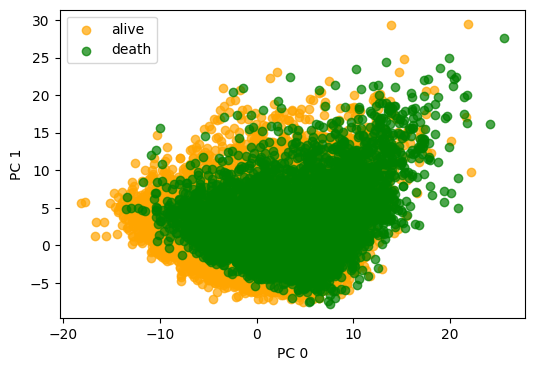

In [73]:
# Plot PCA 

plt.figure(figsize=(6,4))
plt.scatter(df_pca_0.loc[:,0], df_pca_0.loc[:,1], 
            color = 'orange', alpha = 0.7, label = 'alive')
plt.scatter(df_pca_1.loc[:,0], df_pca_1.loc[:,1], 
            color = 'green', alpha = 0.7, label = 'death')

plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.legend()
plt.show()

 - We can drop the 'readmission_status' since it has only one value - zero. 
 - We can also drop the 'APACHE grouping' variables - 'apache_3j_bodysystem', 'apache_2_bodysystem', since they just grouping columns for APACHE2/APACHE3
 - We may drop the 'gender' and 'ethnicity' cause they are highly biased. We found that female, Caucasian, Hipanic tend to have high probability of death through EDA. The probability of death comes from her/his health status, so we need to remove social cause like gender and ethnicity.
 
 - There are lots of missing values, thus standardization is better in our case, which is less affected by missing values than normalization. (calculate mean and standard deviation based on the non-missing values)
 - When tried pairwise deletion, only 30 of rows remain. Thus, we need to do other method of imputation.
 
 - PCA result (1) with 'mode'
   - Total number of components: 155         
   - Component 1st : 0.10551495956388124         
   - Component 2nd : 0.05815092433650027         
   - Component 3rd : 0.04258076901388277  
   
- PCA result (2) with 'median'
   - Total number of components: 155         
   - Component 1st : 0.10476920960895766         
   - Component 2nd : 0.055864442313909295         
   - Component 3rd : 0.04437411026826552